# Datan suodattimien vertailu

Käytämme tehtävissä CMS:n tutkimusdataa. Relevanttien tapahtumien löytäminen valtavasta informaatiotulvasta vaatii kuitenkin datan suodatusta joillakin kriteereillä. Kriteerien valinta on tärkeä vaihe, koska niiden avulla voidaan keskittyä tietyn tyyppisiin tapahtumiin. On tärkeää valita kriteerit oikein ettei dataa vääristellä näyttämään haluttua tulosta. 
> Tiukemmat kriteerit tarkoittavat aina tutkittavan datamäärän pienemistä mutta toisaalta löysillä kriteereillä kiinnostavat tapahtumat voivat hukkua taustakohinaan.

Tehtävänä on verrata CMS:n avoimendatan portaalista löytyviä tiedostoja ja havaita valintakriteerien vaikutus saatuihin tuloksiin.

### Liipaisu järjestelmä 

CMS-ilmaisimessa törmäytetään protoni ryppäitä noin **40 miljoonaa** kertaa sekunnissa tämä tarkoittaa noin **miljardia** (1 000 000 000 = $10^9$) protoni-protoni vuorovaikutusta joka sekuntti. Tämä tuottaa käsittämättömän määrän dataa, jota on karsittava reilusti ennen kuin sitä voi mitenkään hyödyntää. [1]

#### 1. vaihe
Ensimmäisen vaiheen liipaisin on täysin automaattinen ja se karsii datasta jo noin 99,7% pois. Ensimmäisen liipaisimen täytyy olla todella nopea, sen täytyy tehdä valita noin 25 nanosekunnissa ennen kuin seuraava protonirypäs saapuu. Vain harva protonien välisistä vuorovaikutuksista johtaa suurienergisiin törmäyksiin joita 1 asteen liipaisin tunnistaa. [1]

#### 2. vaihe
Seuraava vaihe informaatio vyöryn käsittelyssä on luoda törmäykseen liittyvistä tuhansien eri ilmaisimien lähettämistä signaaleista kokonaisuus. Tätä kokonaisuutta kutsutaan "tapahtumaksi" (event). 2 vaiheen liiipaisin järjestelä saa joka sekuntti noin 100 000 tapahtumaa jotka se koostaa kokonaisuuksiksi ja lähettää edelleen "tietokonefarmille" [1]

"Tietokonefarmilla" toimii yli 1000 tietokonetta jotka suorittavat monimutkaisia laskuja ja testejä tapahtumille. Tuloksena säilytetään noin 100 tapahtumaa, loput 99900 hävitetään joka sekuntti.                      [1]

Ronskin karsintaprosessin jälkeenkin CMS tuottaa valtavasti dataa, jota tutkijat analysoivat monia vuosia. Tarkka tutkimustyö tehdään siihen tarkoitetuilla ohjelmointikielillä mutta käyttämämme _csv_ tiedostot sisältävät samaa autenttista dataa. Data ei ole tarkkaa vaan siinä on aina taustakohinaa. Tarkoitus ei olekkaan suodattaa datasta kaikkea "ylimääräistä", vaan juuri tutkia käyttäytyvätkö hiukkaset ennustteemme mukaisesti vai onko kenties joitain poikkeamia. 



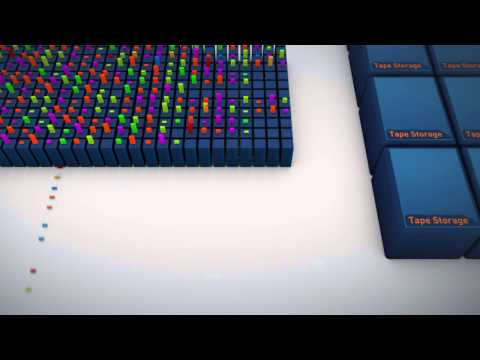

In [2]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('jDC3-QSiLB4')
#https://youtu.be/jDC3-QSiLB4

**** 
## Tehtävä
Tutkitaan CMS:n [avoimen datan portaalista](http://opendata.cern.ch/record/545) löytyviä tiedostoja _'Zmumu.csv'_ ja _'Zee.csv'_. Tiedostot on tallennettu samoilta CMS:n 2011 ajoista, mutta niissä on käytetty eri kriteerejä liipaisujärjestelmän 2. vaiheessa. 
- _'Zmumu.csv'_ 
    - Tapahtumassa havaittiin kaksi myonia
    - Myonien liikemärät olivat tarpeeksi suuret $p_T > 20GeV$
    - Myonit osuivat ilmaisimen tarkimpiin osiin $|pseudorapiditetti| < 2.1$
    - Kahden myonin invarainttimassa asettui välille $60GeV < M < 120GeV$
- _'Zee.csv'_
    - Tapahtumassa havaittiin kaksi elektronia
    - Elektronien liikemäärät olivat tarpeeksi suuret $p_T > 25GeV$
    - Kahden elektronin invarianttimassa asettui välille $60GeV < M < 120GeV$
    
    [2]

Tutkitaan histogrammien avulla millaisia eroja ja yhtäläisyyksiä kriteerit aiheuttavat.

In [3]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Haetaan data ja tallennetaan se muuttujiin _'zee'_ ja _'zmumu'_. Nimet viittaavat Z bosonin hajoamisreitteihin. 

In [6]:
zee = pandas.read_csv('https://raw.githubusercontent.com/cms-opendata-education/cms-jupyter-materials-finnish/master/Data/Zee_Run2011A.csv')
zee.head()

,Run,Event,pt1,eta1,phi1,Q1,type1,sigmaEtaEta1,HoverE1,isoTrack1,...,pt2,eta2,phi2,Q2,type2,sigmaEtaEta2,HoverE2,isoTrack2,isoEcal2,isoHcal2
0,163286,109060857,37.5667,2.289180,2.052600,-1,EE,0.025125,0.008973,0.00000,...,45.4315,1.47064,-1.16305,1,EB,0.000753,0.000000,0.000000,1.019030,0.000000
1,163286,109275715,36.2901,-0.837253,-1.585920,1,EB,0.007829,0.043751,0.00000,...,60.5754,-0.48957,1.04960,-1,EB,0.011246,0.000000,0.718473,1.846060,0.000000
2,163286,109075352,25.9705,-0.697420,1.635990,-1,EB,0.009715,0.040728,6.28701,...,45.2954,-2.04009,3.11875,1,EE,0.025972,0.028008,15.217000,4.533720,3.836990
3,163286,109169766,41.0075,1.461920,-0.532464,1,EB,0.008753,0.000000,0.00000,...,45.9013,1.15606,2.47858,-1,EB,0.008590,0.000000,0.000000,2.438830,0.567555
4,163286,108947653,39.8985,-0.592666,-2.394720,1,EB,0.015261,0.000000,2.54347,...,34.8931,-2.24444,0.61061,-1,EE,0.029025,0.000000,12.422900,0.453359,0.909608


In [7]:
zmumu = pandas.read_csv('https://raw.githubusercontent.com/cms-opendata-education/cms-jupyter-materials-finnish/master/Data/Zmumu_Run2011A.csv')
zmumu.head()

,Run,Event,pt1,eta1,phi1,Q1,dxy1,iso1,pt2,eta2,phi2,Q2,dxy2,iso2
0,165617,74969122,54.7055,-0.432396,2.574210,1,-0.074544,0.499921,34.2464,-0.988480,-0.498704,-1,0.071222,3.42214
1,165617,75138253,24.5872,-2.052200,2.866570,-1,-0.055437,0.000000,28.5389,0.385163,-1.991170,1,0.051477,0.00000
2,165617,75887636,31.7386,-2.259450,-1.332290,-1,0.087917,0.000000,30.2344,-0.468419,1.883310,1,-0.087639,0.00000
3,165617,75779415,39.7394,-0.712338,-0.312266,1,0.058481,0.000000,48.2790,-0.195625,2.970320,-1,-0.049201,0.00000
4,165617,75098104,41.2998,-0.157055,-3.040770,1,-0.030463,1.228040,43.4508,0.590958,-0.042756,-1,0.044175,0.00000


Luonnollinen suure tiedostojen vertailuun on invariantti massa. Sitä ei kuitenkaan ole valmiiksi lakettu haetuissa tiedostoissa. Onneksi tämä onkin jo _'1-Laske-invariantti-massa.ipynb'_ tehtävästä tuttu ongelma ja osaamme ratkaista sen muutamalla rivillä python koodia. 
> Laske invariantit massat molemmille tiedostoille. Apua saat [tehtävästä 1](https://mybinder.org/v2/gh/cms-opendata-education/cms-jupyter-materials-finnish/master?filepath=Oppimiskokonaisuudet%2FAvoin-data-hiukkasfysiikassa%2F3_Data-analyysi%2F1_Laske-invariantti-massa.ipynb).
<br>
$\color{purple}{\text{Korvaa alla olevasta koodista '???'  invariantin massan laskuilla }}$ älä muuta muuttjien nimiä, joihin tulokset tallennetaan.

In [8]:
m_zee = np.sqrt(2*zee.pt1*zee.pt2*
                            (np.cosh(zee.eta1-zee.eta2) - np.cos(zee.phi1-zee.phi2)))
m_zmumu = np.sqrt(2*zmumu.pt1*zmumu.pt2*
                            (np.cosh(zmumu.eta1-zmumu.eta2) - np.cos(zmumu.phi1-zmumu.phi2)))

Piirretään molempien tiedostojen invariantit massat samaan histogrammiin, jotta niitä olisi helppo verrata.

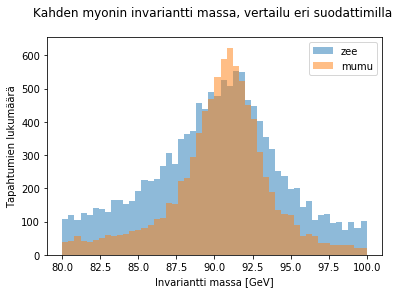

In [9]:
plt.xlabel('Invariantti massa [GeV]')
plt.ylabel('Tapahtumien lukumäärä')
plt.title('Kahden myonin invariantti massa, vertailu eri suodattimilla \n')
plt.hist(m_zee, bins=50, range=(80,100), alpha=0.5, label='zee')
plt.hist(m_zmumu, bins=50, range=(80,100), alpha=0.5, label='zmumu')
plt.legend (loc='upper right')
plt.show()

****
## $\color{green}{\text{Pohdintaa}}$

Molemmissa datasettien invarianteissamassoissa on selvä piikki noin 90GeV 
 - Minkä hiukkasen hajoamiseen piikki liittyy?
 - Mitä piikin muoto kertoo?
 - Kummanssa mittauksessa on vähemmän kohinaa, eli tulos on ns. tarkempi? 

****
### Elektronien ja myonien havitseminen
CMS on kehitetty erityisesti myonien havaitsemiseen. Myonit kulkevat elektroneja pitemmän matkan ilmaisimessa ja jättävät pitemmälle välille signaaleja. Pitemmällä matkalla niiden rata ehtii myös kääntyä enemmän vahvan magneettikentän vaikutuksesta. Nämä seikat tekevät myonihavainnoista hieman tarkempia.
Toisaalta esimerkissä käytettiin hyvin suurienergisiä hiukkasia. Elektronien mittaus on sitä tarkempaa mitä enemmän liike-energiaa niillä on. ECAL osassa suurempi energiset elektronit aiheuttavat suuremman signaalin johon kohina vaikuttaa vähemmän. Myoneita taas saadaan mitattua sitä terkemmin mitä vähemmän niillä on liike-energiaa, silloin niiden rata kaartuu enemmän magneettikentässä.

$\color{green}{\text{Kokeile itse}}$ piirtä kahden eri tiedoston invariantit massat samaan kuvaan ja tulkitse tuloksia. Tidostoja voit löytää kansiosta : _cms-opendata-education/cms-jupyter-materials-finnish/master/Data_

In [ ]:
#Kirjoita oma koodisi tähän

## Lähteet
[1] Liipaisujärjestelmän toiminta, Triggering and Data Acquisition, luettu 6.2019.
Url: https://cms.cern/detector/triggering-and-data-acquisition


[2] Datasets derived from the Run2011A SingleElectron, SingleMu, DoubleElectron, and DoubleMu primary datasets
McCauley, Thomas;
Url:http://opendata.cern.ch/record/545